### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?


Polynomial functions and kernel functions are closely related in machine learning algorithms, particularly in the context of Support Vector Machines (SVMs) and Kernel methods. Let's explore their relationship and how kernel functions enable us to efficiently use polynomial features in SVMs.

Polynomial functions:
A polynomial function is a mathematical function that involves variables raised to non-negative integer powers. For example, a simple polynomial function in one variable (x) can be represented as:
f(x) = a + bx + cx^2

In higher dimensions, the polynomial function can have more variables and terms with different powers.

Kernel functions:
Kernel functions are used in kernel methods, and SVMs are a prime example of such methods. Kernel methods are designed to operate in the input space without explicitly transforming the data into a higher-dimensional space. They rely on a kernel function to compute the dot product between feature vectors implicitly in the higher-dimensional space, even when the data is still in the original feature space.
The general idea of kernel methods is to take advantage of the so-called "kernel trick," which avoids the computational cost of explicitly mapping the data to higher-dimensional spaces while still benefiting from the advantages of higher-dimensional feature spaces.

Relationship between polynomial functions and kernel functions:
Kernel functions are often used to implicitly apply polynomial transformations to the data in SVMs. This allows SVMs to capture non-linear decision boundaries without explicitly computing the polynomial features.
For example, consider a 2D dataset with two classes that cannot be separated by a straight line (linear decision boundary). By applying a polynomial kernel function of degree 'd', we implicitly transform the data into a higher-dimensional space where the data becomes separable by a hyperplane (polynomial decision boundary) of degree 'd'.

The polynomial kernel function can be defined as:

K(x, y) = (x^T y + c)^d

where 'x' and 'y' are feature vectors, 'd' is the degree of the polynomial, and 'c' is an optional constant term.

By using the polynomial kernel function, the SVM implicitly works with polynomial features without the need to explicitly compute them, making the computation more efficient and avoiding potential memory and computation issues when dealing with high-dimensional feature spaces.

### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?


Accuracy: 0.9050


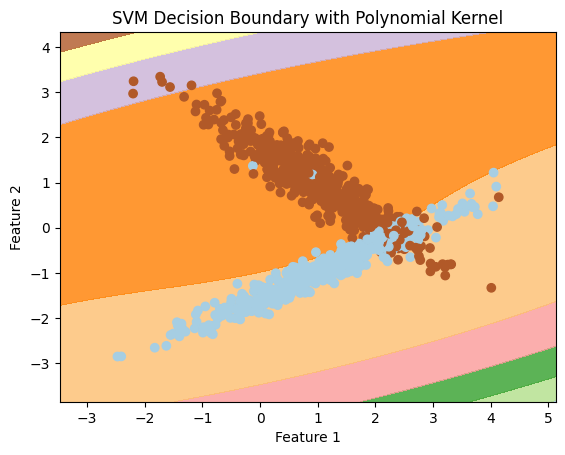

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
svm_poly.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_poly.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Create a meshgrid for visualization
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get the model's decision function for the meshgrid points
Z = svm_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Polynomial Kernel')
plt.show()


### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?


In Support Vector Regression (SVR), the value of epsilon (often denoted as ε) is a hyperparameter that controls the width of the margin around the regression line. The margin is a zone around the regression line within which no penalty is applied to data points. In other words, data points falling inside the margin are not considered support vectors and do not contribute to the loss function during training.

Increasing the value of epsilon in SVR has a significant effect on the number of support vectors in the model. Let's explore how this happens:

1. Small Epsilon (Narrow Margin):
When epsilon is small, the margin around the regression line is narrow. This means that data points need to be very close to the regression line to be considered inside the margin. As a result, more data points fall outside the margin and are treated as support vectors during training. These support vectors have a non-zero coefficient in the solution, contributing to the complexity of the model.

2. Large Epsilon (Wide Margin):
As epsilon increases, the margin around the regression line becomes wider. Now, data points can be farther away from the regression line and still be inside the margin. Consequently, more data points fall inside the margin, and fewer data points are considered support vectors. The model becomes simpler with fewer support vectors, which often leads to better generalization and improved model performance on unseen data.

### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

1. Kernel Function:
The kernel function is a crucial component of SVR, as it determines how the data will be transformed into a higher-dimensional space. The most common kernel functions used in SVR are:
- Linear Kernel: No transformation is applied, and the SVR is equivalent to a linear regression model. This is suitable when the data is approximately linearly separable or when you want a simpler model.
- Polynomial Kernel: The data is mapped to a higher-dimensional space using a polynomial transformation. The degree of the polynomial is controlled by the 'degree' hyperparameter. This is useful when the relationship between the features and target variable is nonlinear and you suspect a polynomial relationship.
- Radial Basis Function (RBF) Kernel: The data is mapped to an infinite-dimensional space using radial basis functions. The 'gamma' hyperparameter controls the width of the RBF kernel. RBF kernels are useful when the data is not linearly separable and you believe the relationship is complex and nonlinear.

2. C Parameter:
The C parameter is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the training error. A smaller C value allows for a wider margin and more margin violations, while a larger C value penalizes margin violations more heavily, leading to a narrower margin. The C parameter is used to prevent overfitting. If the model is overfitting, reducing C can help by allowing more margin violations and potentially improving generalization.

3. Epsilon Parameter:
The epsilon parameter (ε) is the width of the insensitive zone around the regression line in ε-insensitive loss function. It defines the tube around the predicted values within which no penalty is applied to errors. A smaller epsilon results in a tighter tube, and a larger epsilon results in a wider tube. A larger epsilon allows for more tolerance of errors and can lead to a simpler model with fewer support vectors.

4. Gamma Parameter:
The gamma parameter (γ) is specific to the RBF kernel and controls the influence of each training sample. A small gamma value means the influence of the training samples is far-reaching, leading to a smoother decision boundary. On the other hand, a large gamma value means the influence of the training samples is localized, leading to a more complex and wiggly decision boundary that can potentially lead to overfitting.

Here are some examples of when you might want to increase or decrease each parameter:

1. Kernel Function:

- Increase the degree of the polynomial kernel when you suspect a higher-degree polynomial relationship between features and target.
- Increase gamma for the RBF kernel when the data has complex, nonlinear relationships.
2. C Parameter:

- Increase C when you want to penalize margin violations more heavily and prioritize fitting the training data well.
- Decrease C when you want a wider margin and prioritize a simpler model with more tolerance for margin violations.
3. Epsilon Parameter:

- Increase epsilon when you want a wider insensitive zone and allow more data points to be inside the tube.
- Decrease epsilon when you want a tighter insensitive zone and stricter adherence to the predicted values.
4. Gamma Parameter:

- Decrease gamma when you want a smoother decision boundary and more influence from distant training samples.
- Increase gamma when you want a more complex decision boundary and more localized influence from nearby training samples.

### Q5. Assignment:
- Import the necessary libraries and load the dataseg
- Split the dataset into training and testing setZ
- Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
- Create an instance of the SVC classifier and train it on the training datW
- use the trained classifier to predict the labels of the testing datW
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-scoreK
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performanc_
- Train the tuned classifier on the entire dataseg
- Save the trained classifier to a file for future use.

Note - You can use any dataset of your choice for this assignment, but make sure it is suitable for
classification and has a sufficient number of features and samples.

In [21]:
# importing some libraries and loading data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data
y = wine.target

In [23]:
# splitting training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=10)

In [24]:
# importing model and making an instance 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train,y_train)


SVC(kernel='linear')

In [32]:
# pridicting the test dataset using machine learning model
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1,
       0])

In [31]:
# evaluating performnce metrics 
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.74      0.85        23
           2       0.82      1.00      0.90         9

    accuracy                           0.87        45
   macro avg       0.86      0.91      0.87        45
weighted avg       0.90      0.87      0.86        45



In [35]:
# hypterparameter tunning the model to improve performence 
parameters = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier,param_grid=parameters,refit=True,cv=5,verbose=3)


In [36]:
#training and predicting the tunned model 
clf.fit(x_train,y_train)
y_pred_tuned = clf.predict(x_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.846 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.962 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.962 total time=   0.1s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.963 total time=   0.1s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.846 total time=   0.1s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.962 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 1/5] END ......C=1, gamm

[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.963 total time=   0.1s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.846 total time=   0.2s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.962 total time=   0.1s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 4/5] END .....C=10, gamm

[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.962 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.346 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.370 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.346 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.346 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.963 total time=   0.0s
[CV 2/5] END ...C=100, gamma

[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.963 total time=   0.1s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.923 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=1.000 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.963 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.846 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.962 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.407 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.407 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.481 total time=   0.0s
[CV 4/5] END .....C=1000, ga

In [37]:
y_pred_tuned

array([0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1,
       0])

In [38]:
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [41]:
print(accuracy_score(y_test,y_pred_tuned))
print(classification_report(y_test,y_pred_tuned))


0.8666666666666667
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.74      0.85        23
           2       0.82      1.00      0.90         9

    accuracy                           0.87        45
   macro avg       0.86      0.91      0.87        45
weighted avg       0.90      0.87      0.86        45



In [42]:
import pickle
pickle.dump(clf,open('61_svm_07_april_model.pkl','wb'))